In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
conn=sql.connect('database (1).sqlite')

In [3]:
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [4]:
pd.read_sql_query("select * from Salaries",conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,9999999.00,567595.43,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
2,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
3,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
4,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189082.74,,316285.74,316285.74,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148649,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [5]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

Top 10 highest paid employees (by TotalPayBenefits)

In [6]:
q = 'select EmployeeName, TotalPayBenefits from Salaries order by 2 desc limit 10'
sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,David Shinn,510732.68
2,Amy P Hart,479652.21
3,William J Coaker Jr.,436224.36
4,Gregory P Suhr,425815.28
5,Joanne M Hayes-White,422353.40
6,Gregory P Suhr,418019.22
7,Joanne M Hayes-White,417435.10
8,Ellen G Moffatt,415767.94
9,Gary Altenberg,407274.78


Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'

In [7]:
q= 'select Year,count (*) as MissingCount from Salaries where EmployeeName in ("Not Provided", "Not provided") group by Year'
sql_query(q)

,Year,MissingCount
0,2011,1
1,2012,1
2,2014,4


Number of unique agencies

In [8]:
q = 'select count (distinct Agency) "Number of unique agencies" from salaries'
sql_query(q)

,Number of unique agencies
0,1


Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [9]:
q = 'select round(avg(BasePay),2) "Average Base Pay", round(avg(OvertimePay),2) "Average Overtime Pay", round(avg(TotalPay),2) "Average Total Pay" from salaries where Year = 2011'
sql_query(q) 

,Average Base Pay,Average Overtime Pay,Average Total Pay
0,63593.4,4524.41,71992.05


Plot the top 10 job titles with the highest TotalPay in 2014.


<Axes: xlabel='JobTitle'>

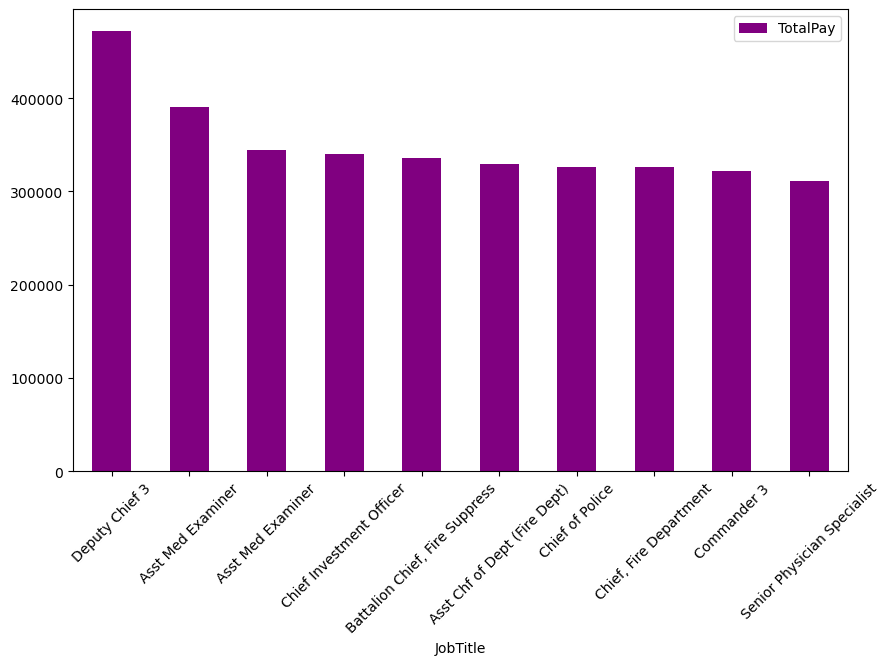

In [10]:
    q = 'select TotalPay, JobTitle from salaries where Year = 2014 order by 1 desc limit 10'
    x = sql_query(q)
    x.plot(kind = 'bar', x = 'JobTitle',y = 'TotalPay', rot = 45, color='purple', figsize = (10,6))

Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [11]:
q='select distinct Jobtitle, OvertimePay from Salaries where JobTitle != "Not provided" and OvertimePay>150000 order by JobTitle'
sql_query(q)

,JobTitle,OvertimePay
0,Deputy Sheriff,196689.18
1,Deputy Sheriff,156077.49
2,Deputy Sheriff,173547.73
3,Deputy Sheriff,173178.23
4,Deputy Sheriff,169659.92
5,EMT/Paramedic/Firefighter,192424.49
6,Firefighter,160418.47
7,"Lieutenant, Fire Suppression",220909.48
8,"Lieutenant, Fire Suppression",163477.81


Find all employees whose job titles contain the word “CHIEF”

In [12]:
q='select EmployeeName, JobTitle from Salaries where JobTitle like "%CHIEF%" order by 2'
sql_query(q)

,EmployeeName,JobTitle
0,ROBERT BRYAN,ASSISTANT CHIEF ATTORNEY I
1,JULIA M C FRIEDLANDER,ASSISTANT CHIEF ATTORNEY I
2,JULIE VAN NOSTERN,ASSISTANT CHIEF ATTORNEY I
3,ALEETA VAN RUNKLE,ASSISTANT CHIEF ATTORNEY I
4,DONALD MARGOLIS,ASSISTANT CHIEF ATTORNEY I
...,...,...
622,John J Loftus,Deputy Chief 3
623,Michael J Biel,Deputy Chief 3
624,Jeffrey Myers,Emergency Medical Svcs Chief
625,Jeffrey Myers,Emergency Medical Svcs Chief


Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [13]:
q = 'select count(EmployeeName) EmployeeCount, JobTitle, Year from Salaries where (JobTitle like "%ENGINEER%" or JobTitle like "%FIRE%") and (Year = "2012" or Year = "2013") group by JobTitle, Year order by Year'
sql_query(q)

,EmployeeCount,JobTitle,Year
0,10,Administrative Engineer,2012
1,9,Apprentice Stationary Engineer,2012
2,156,Assoc Engineer,2012
3,6,Asst Chf of Dept (Fire Dept),2012
4,36,"Battlion Chief, Fire Suppressi",2012
...,...,...,...
76,5,Pilot of Fire Boats,2013
77,36,Senior Stationary Engineer,2013
78,1,Signal and Systems Engineer,2013
79,233,Stationary Engineer,2013


Distinct job titles starting with "CAPTAIN"


In [14]:
q='select distinct JobTitle from salaries where JobTitle like "%CAPTAIN"'
sql_query(q)

,JobTitle
0,SHERIFF'S CAPTAIN
1,Sheriff's Captain


Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [15]:
q='select EmployeeName, BasePay, TotalPay from Salaries where BasePay != "Not Provided" and BasePay > 50 and TotalPay < 150000'
sql_query(q)

,EmployeeName,BasePay,TotalPay
0,JAY DOWKE,112380.37,149987.24
1,MURRAY BOND,149975.8,149975.80
2,MARILOU GAN,119703.78,149970.85
3,BRIAN COLLINS,105934.65,149964.61
4,GREGORY NEAL,106065.2,149952.47
...,...,...,...
135257,Lorrie A Aspiras,58.45,58.45
135258,Michael S Wong,57.94,57.94
135259,Miguel P Lucana,55.1,55.10
135260,Johnmark L Henderson,52.13,52.13
